In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import drive
#drive.mount("/content/drive/")

In [3]:
#!ls "/content/drive/My Drive/News"

In [4]:
real = pd.read_csv("Fake.csv")
fake = pd.read_csv("True.csv")

In [5]:
#Displayed the first 5 rows of the real news dataset
real.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
#Displayed the first 5 rows of the fake news dataset
fake.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
#Shape of real news dataset
print("Real news: ",real.shape)
#Shape of fake news dataset
print("Fake News: ", fake.shape)

Real news:  (23481, 4)
Fake News:  (21417, 4)


In [8]:
#Assigning a value of 0 for all real news data and placing it in the dataframe
class0 = []

for i in range(real.shape[0]):
  class0.append(0)

real.insert(4, "class", class0, True)

In [9]:
#Assigning a value of 1 for all fake news data and placing it in the dataframe
class1 = []

for i in range(fake.shape[0]):
  class1.append(1)

fake.insert(4, "class", class1, True)

In [10]:
#Concactenating fake news and real news into 1 total dataset
total = pd.concat([real,fake])
total = total.sample(frac = 1)

In [11]:
#Shape of total
total.shape

(44898, 5)

In [12]:
#total = total.sample(frac=1)
pd.set_option('display.width', total.shape[0])
total.head()


,title,text,subject,date,class
16275,France's Macron expresses full support to Span...,CAYENNE (Reuters) - French president Emmanuel ...,worldnews,"October 27, 2017",1
15820,EU lawmakers see little progress in Sri Lanka ...,COLOMBO (Reuters) - European lawmakers said on...,worldnews,"November 2, 2017",1
1521,U.S. Senate confirms Heath Tarbert to be an as...,WASHINGTON (Reuters) - The U.S. Senate voted o...,politicsNews,"September 27, 2017",1
4540,Protests Erupt In Charlotte After Cops Kill D...,"Protests have erupted in Charlotte, North Caro...",News,"September 20, 2016",0
20582,Saudi Arabia suspends any dialogue with Qatar:...,DUBAI (Reuters) - Saudi Arabia on Saturday sus...,worldnews,"September 8, 2017",1


In [13]:
#Extract only the values for title (input) and class (output)
data = total[['title','class']]
data.head()

,title,class
16275,France's Macron expresses full support to Span...,1
15820,EU lawmakers see little progress in Sri Lanka ...,1
1521,U.S. Senate confirms Heath Tarbert to be an as...,1
4540,Protests Erupt In Charlotte After Cops Kill D...,0
20582,Saudi Arabia suspends any dialogue with Qatar:...,1


In [14]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())

Mean Length 80.11171989843646
Min Length 8
Max Length 286


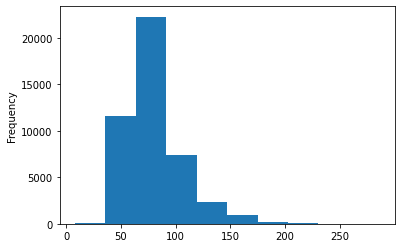

In [15]:
#plotting the frequency of characters on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()

In [16]:
#!pip install wordcloud

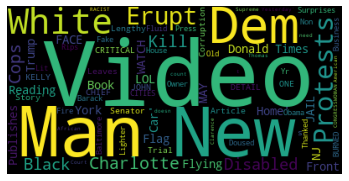

In [17]:
#Word cloud of most common words from real news 
#For fake news, change ["class"] == 0 to 1
from wordcloud import WordCloud, STOPWORDS

#Note to self: fix for entire dataset
text = data[data["class"] == 0].values
wc = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [18]:
#Extracting numpy arrays for the title and classes
titles = data["title"].values
labels = data["class"].values

In [29]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
#We teach our model based on the training set (including the labels)
#We take the labels away to test our model with the testing set
title_train, title_test, y_train, y_test = train_test_split(titles, labels, test_size=0.3, random_state=32)

In [20]:
#!pip install tensorflow-text

In [21]:
import tensorflow_hub as hub
import tensorflow_text as text

In [22]:
#Download bert preprocesser and bert encoder from tensorflow_hub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [23]:
def embed(headlines):
    processed = bert_preprocess(headlines)
    return bert_encoder(processed)['pooled_output']

In [24]:
import tensorflow as tf

In [25]:
# Input Layers
input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='news')

# BERT layers
processed = bert_preprocess(input_layer)
output = bert_encoder(processed)

# Neural Network Layers
layer = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])
layer = tf.keras.layers.Dense(10,activation='relu', name='hidden')(layer)
layer = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(layer)


model = tf.keras.Model(inputs=[input_layer],outputs=[layer])

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 news (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['news[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Train model on 5 epochs
model.fit(title_train,y_train,epochs=2)

In [ ]:
#Evaluate model on test data
model.evaluate(title_test,y_test)

281/281 [==============================] - 205s 726ms/step - loss: 0.2241 - accuracy: 0.9114


[0.22406823933124542, 0.9113585948944092]

In [ ]:
#Download model with pickle
import pickle 

pickle.dump(model, open('bert.pkl','wb'))


INFO:tensorflow:Assets written to: ram://3ff51c16-225f-448e-a63e-a1548f70d3b3/assets


INFO:tensorflow:Assets written to: ram://3ff51c16-225f-448e-a63e-a1548f70d3b3/assets
